In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
file_path = "SmartHome IoT Dataset.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Display initial rows and info
print("Dataset loaded successfully.")
print(df.info())

Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13460 entries, 0 to 13459
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Device ID                13460 non-null  object 
 1   Device Name              13460 non-null  object 
 2   Last Firmware Update     13460 non-null  object 
 3   Operating Time (hrs)     13460 non-null  int64  
 4   Connection Quality       13460 non-null  object 
 5   Device Temperature (°C)  13460 non-null  float64
 6   Device Usage Frequency   13460 non-null  object 
 7   Connectivity Type        13460 non-null  object 
 8   Event Logs               13460 non-null  int64  
 9   Device Priority          13460 non-null  object 
 10  Protocol                 13460 non-null  object 
 11  Label                    13460 non-null  object 
 12  Attack Type              6730 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usag

In [4]:
df.head(7)

,Device ID,Device Name,Last Firmware Update,Operating Time (hrs),Connection Quality,Device Temperature (°C),Device Usage Frequency,Connectivity Type,Event Logs,Device Priority,Protocol,Label,Attack Type
0,ID1527,Smart Plug,2015-05-31,56,Good,16.8,Occasionally,Bluetooth,86,Low,CoAP,normal,NaN
1,ID1352,Smart Camera,2016-11-25,52,Good,23.9,Occasionally,Bluetooth,39,High,Zigbee,normal,NaN
2,ID2183,Smart Camera,2018-01-30,91,Poor,14.5,Weekly,Zigbee,11,High,CoAP,compromised,Jamming
3,ID9355,Smart Camera,2011-07-22,33,Excellent,10.2,Daily,Zigbee,53,High,MQTT,normal,NaN
4,ID4526,Smart Light,2020-11-14,19,Good,20.0,Weekly,Bluetooth,21,Low,MQTT,normal,NaN
5,ID4481,Smart Plug,2019-01-17,28,Excellent,10.6,Daily,WiFi,63,Low,CoAP,normal,NaN
6,ID8096,Smart Camera,2011-11-05,19,Poor,23.7,Daily,Zigbee,37,High,MQTT,compromised,MITM


In [5]:
# Check for missing values
print("\nChecking for missing values...")
print(df.isnull().sum())

# Fill missing values (if any) - For simplicity, forward fill
df.fillna(method='ffill', inplace=True)

# Encode categorical features
categorical_columns = ["Device Name", "Connection Quality", "Device Usage Frequency", 
                       "Connectivity Type", "Protocol", "Attack Type"]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

print("\nCategorical features encoded successfully.")

# Normalize numerical features
numerical_columns = ["Operating Time (hrs)", "Device Temperature (°C)", "Event Logs"]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nNumerical features normalized successfully.")

# Check dataset after preprocessing
print("\nDataset after preprocessing:")
print(df.head())



Checking for missing values...
Device ID                     0
Device Name                   0
Last Firmware Update          0
Operating Time (hrs)          0
Connection Quality            0
Device Temperature (°C)       0
Device Usage Frequency        0
Connectivity Type             0
Event Logs                    0
Device Priority               0
Protocol                      0
Label                         0
Attack Type                6730
dtype: int64

Categorical features encoded successfully.

Numerical features normalized successfully.

Dataset after preprocessing:
  Device ID  Device Name Last Firmware Update  Operating Time (hrs)  \
0    ID1527            3           2015-05-31             -0.326781   
1    ID1352            0           2016-11-25             -0.421983   
2    ID2183            0           2018-01-30              0.506240   
3    ID9355            0           2011-07-22             -0.874195   
4    ID4526            1           2020-11-14             -1.2074

C:\Users\Nidhi\AppData\Local\Temp\ipykernel_9304\4094936454.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
# Define features (X) and target (y)
X = df.drop(columns=["Label"])  # Drop the target column
y = df["Label"]  # Target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDataset split into training and testing sets successfully.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")



Dataset split into training and testing sets successfully.
Training samples: 10768, Testing samples: 2692


In [12]:
# Identify categorical columns to encode
categorical_columns = [
    "Device Name", 
    "Connection Quality", 
    "Device Usage Frequency", 
    "Connectivity Type", 
    "Protocol", 
    "Attack Type", 
    "Device Priority"
]

# Apply Label Encoding to all categorical columns
label_encoders = {}  # Dictionary to store encoders for later use
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode column
    label_encoders[col] = le  # Save encoder for potential decoding later

print("\nAll categorical features encoded successfully.")

# Normalize numerical features
numerical_columns = ["Operating Time (hrs)", "Device Temperature (°C)", "Event Logs"]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nNumerical features normalized successfully.")



All categorical features encoded successfully.

Numerical features normalized successfully.


In [13]:
# Remove 'Device ID' and 'Last Firmware Update' from the features
X = df.drop(columns=["Label", "Device ID", "Last Firmware Update"])  # Exclude unnecessary columns
y = df["Label"]  # Target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDataset split into training and testing sets successfully.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")



Dataset split into training and testing sets successfully.
Training samples: 10768, Testing samples: 2692


In [14]:
# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("\nModel trained successfully.")



Model trained successfully.


In [18]:
import random

# Add noise to numerical features
for col in ["Operating Time (hrs)", "Device Temperature (°C)", "Event Logs"]:
    noise = np.random.normal(0, 0.1, df[col].shape)  # Adjust the standard deviation (0.1) as needed
    df[col] += noise

# Randomly flip labels for a small percentage of samples
flip_indices = df.sample(frac=0.02, random_state=42).index  # Flip labels for 2% of the data
df.loc[flip_indices, "Label"] = df.loc[flip_indices, "Label"].apply(lambda x: "normal" if x == "compromised" else "compromised")



In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
categorical_columns = [
    "Device Name", 
    "Connection Quality", 
    "Device Usage Frequency", 
    "Connectivity Type", 
    "Device Priority", 
    "Protocol", 
    "Attack Type"
]

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for potential decoding later

print("Categorical features encoded successfully.")


Categorical features encoded successfully.


In [21]:
# Encode the target column
label_encoder_label = LabelEncoder()
df["Label"] = label_encoder_label.fit_transform(df["Label"])  # 'normal' -> 0, 'compromised' -> 1

# Define features and target
X = df.drop(columns=["Label"])  # All columns except 'Label'
y = df["Label"]  # Target column

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data prepared for training.")


Data prepared for training.


In [23]:
# Drop unnecessary columns
df = df.drop(columns=["Device ID", "Last Firmware Update"], errors="ignore")

print("Unnecessary columns dropped successfully.")


Unnecessary columns dropped successfully.


In [24]:
from sklearn.preprocessing import LabelEncoder

# Re-encode categorical columns
label_encoders = {}
categorical_columns = [
    "Device Name", 
    "Connection Quality", 
    "Device Usage Frequency", 
    "Connectivity Type", 
    "Device Priority", 
    "Protocol", 
    "Attack Type"
]

for col in categorical_columns:
    if col in df.columns:  # Check if the column exists
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

print("Categorical features re-encoded successfully.")


Categorical features re-encoded successfully.


In [25]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["Label"])  # Exclude the target column
y = df["Label"]  # Target column

# Encode the target variable
label_encoder_label = LabelEncoder()
y = label_encoder_label.fit_transform(y)  # 'normal' -> 0, 'compromised' -> 1

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data prepared for model training.")


Data prepared for model training.


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1347
           1       0.97      0.98      0.98      1345

    accuracy                           0.98      2692
   macro avg       0.98      0.98      0.98      2692
weighted avg       0.98      0.98      0.98      2692


Confusion Matrix:
[[1310   37]
 [  22 1323]]


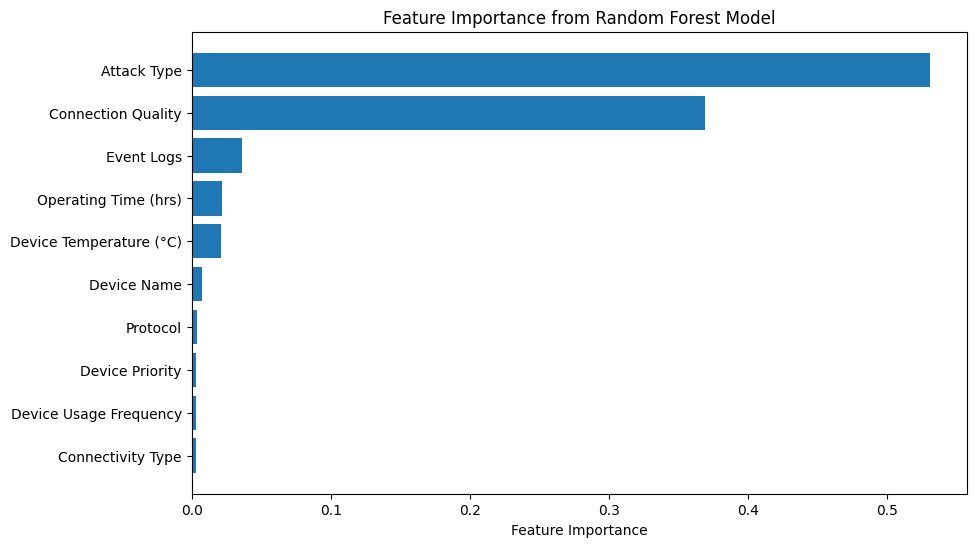

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.show()


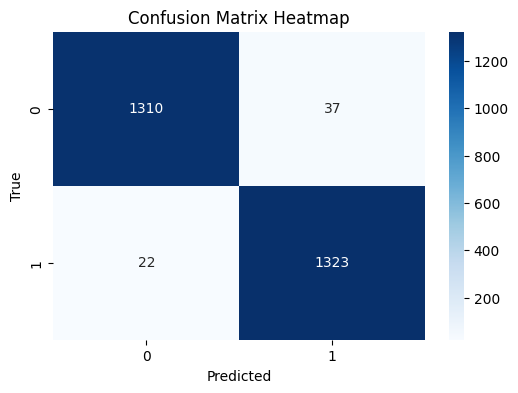

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder_label.classes_, yticklabels=label_encoder_label.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


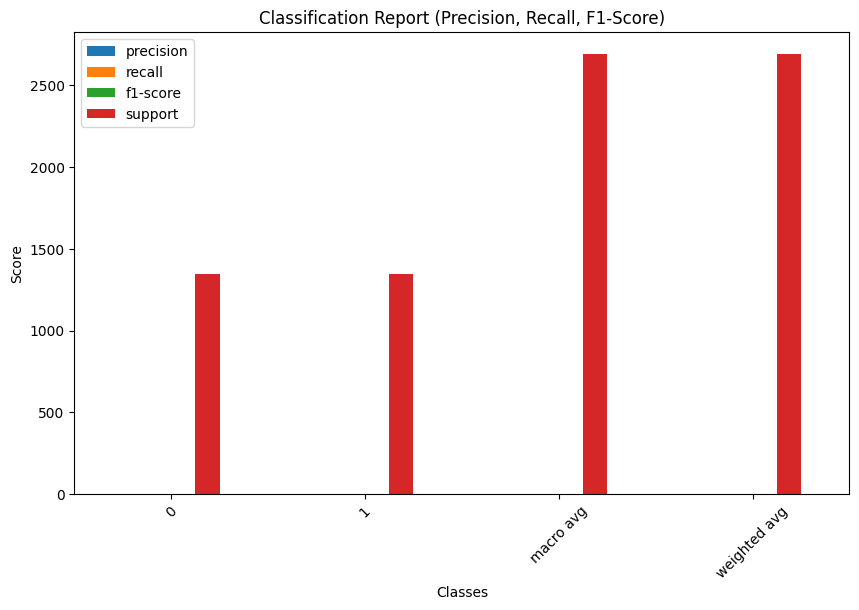

In [29]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
report_df.drop('accuracy', axis=0).plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report (Precision, Recall, F1-Score)')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.show()


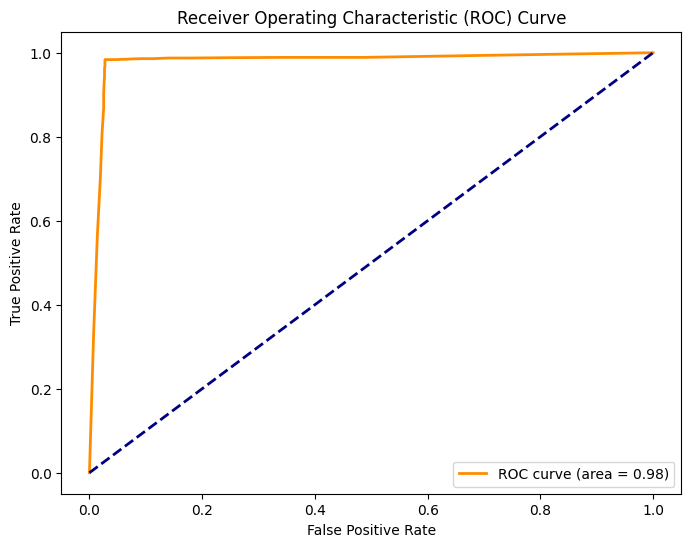

In [30]:
from sklearn.metrics import roc_curve, auc

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
